In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
pcover_taxa_df=pd.read_csv(r"C:\Users\gpkt2\OneDrive\Desktop\Coral_DataSet\Florida Keys Coral Reef Evaluation Dataset\CREMP_CSV_files\CREMP_Pcover_2023_TaxaGroups.csv")
print("Head of pcover_taxa_df:")
print(pcover_taxa_df.head())
print("\nInfo of pcover_taxa_df:")
print(pcover_taxa_df.info())

Head of pcover_taxa_df:
   Year       Date Subregion Habitat  SiteID    Site_name  StationID  \
0  1996  7/25/1996        UK      HB      10  Rattlesnake        101   
1  1996  7/25/1996        UK      HB      10  Rattlesnake        102   
2  1996  7/25/1996        UK      HB      10  Rattlesnake        103   
3  1996  7/25/1996        UK      HB      10  Rattlesnake        104   
4  1996  7/22/1996        UK      HB      11   El Radabob        111   

  Surveyed_all_years  points  Cyanobacteria  Macroalgae  Octocoral  Others  \
0                  N     479            NaN      0.1587     0.0230     0.0   
1                  N     525            NaN      0.2476     0.0400     0.0   
2                  N     558            NaN      0.0323     0.0412     0.0   
3                  N     446            NaN      0.4260     0.0493     0.0   
4                  N     450            NaN      0.3156     0.0067     0.0   

   Porifera  Seagrass  Stony_coral  Substrate  Unknown  Urchins  Zoanthide

In [36]:
regional_tax_cover=pcover_taxa_df.groupby("Subregion")[['Stony_coral', 'Octocoral', 'Macroalgae', 'Seagrass']].mean().reset_index()
print(regional_tax_cover)
counts_df=pd.read_csv(r"C:\Users\gpkt2\OneDrive\Desktop\Coral_DataSet\Florida Keys Coral Reef Evaluation Dataset\CREMP_CSV_files\CREMP_OCTO_Summaries_2023_Density.csv")
temp_df=pd.read_csv(r"C:\Users\gpkt2\OneDrive\Desktop\Coral_DataSet\Florida Keys Coral Reef Evaluation Dataset\CREMP_CSV_files\CREMP_Temperatures_2023.csv")


  Subregion  Stony_coral  Octocoral  Macroalgae  Seagrass
0        LK     0.095001   0.094643    0.140340  0.000034
1        MK     0.057286   0.142482    0.148929  0.000327
2        UK     0.053494   0.147391    0.168916  0.009162


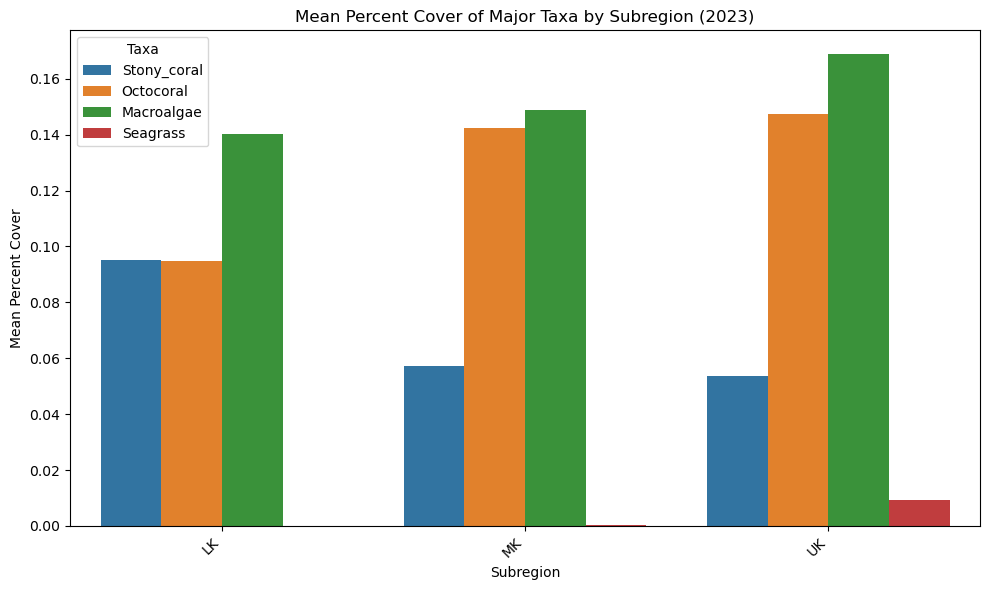

In [37]:
regional_taxa_cover_melted = pd.melt(regional_tax_cover,
                                     id_vars='Subregion',
                                     value_vars=['Stony_coral', 'Octocoral', 'Macroalgae', 'Seagrass'],
                                     var_name='Taxa',
                                     value_name='Mean_Percent_Cover')

# Create a bar plot to compare mean percent cover across subregions
plt.figure(figsize=(10, 6))
sns.barplot(x='Subregion', y='Mean_Percent_Cover', hue='Taxa', data=regional_taxa_cover_melted)
plt.title('Mean Percent Cover of Major Taxa by Subregion (2023)')
plt.xlabel('Subregion')
plt.ylabel('Mean Percent Cover')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Taxa')
plt.tight_layout()
plt.show()

Average Octocoral Species Richness by Subregion:
  Subregion  Average_Octocoral_Richness
0        LK                    3.842593
1        MK                    4.065693
2        UK                    3.232639


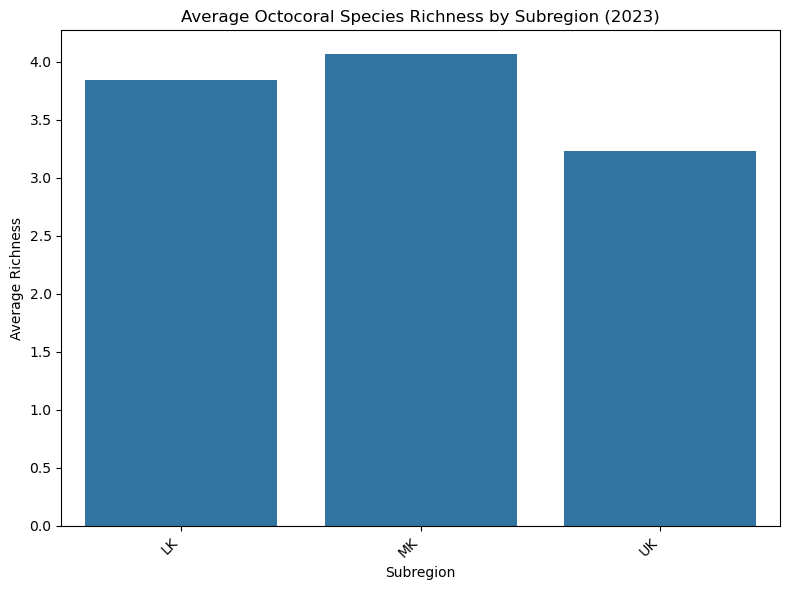

In [42]:
# Identify octocoral species columns from counts_df (which is actually octocoral density)
octocoral_species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana',
                            'Pseudopterogorgia_bipinnata', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa']

# Calculate octocoral species richness per StationID
octocoral_richness = counts_df.groupby('StationID')[octocoral_species_columns].apply(lambda x: (x > 0).sum(axis=1)).reset_index(name='octocoral_richness')

# Merge richness with Subregion
octo_richness_subregion = pd.merge(octocoral_richness, counts_df[['StationID', 'Subregion']].drop_duplicates(), on='StationID', how='inner')

# Calculate average octocoral richness per Subregion
avg_octo_richness_by_subregion = octo_richness_subregion.groupby('Subregion')['octocoral_richness'].mean().reset_index(name='Average_Octocoral_Richness')

print("Average Octocoral Species Richness by Subregion:")
print(avg_octo_richness_by_subregion)

# Visualize average octocoral richness by subregion
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Subregion', y='Average_Octocoral_Richness', data=avg_octo_richness_by_subregion)
plt.title('Average Octocoral Species Richness by Subregion (2023)')
plt.xlabel('Subregion')
plt.ylabel('Average Richness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Total Octocoral Density by Subregion:
  Subregion  Average_Total_Octocoral_Density
0        LK                        12.141975
1        MK                        16.953747
2        UK                        20.763415


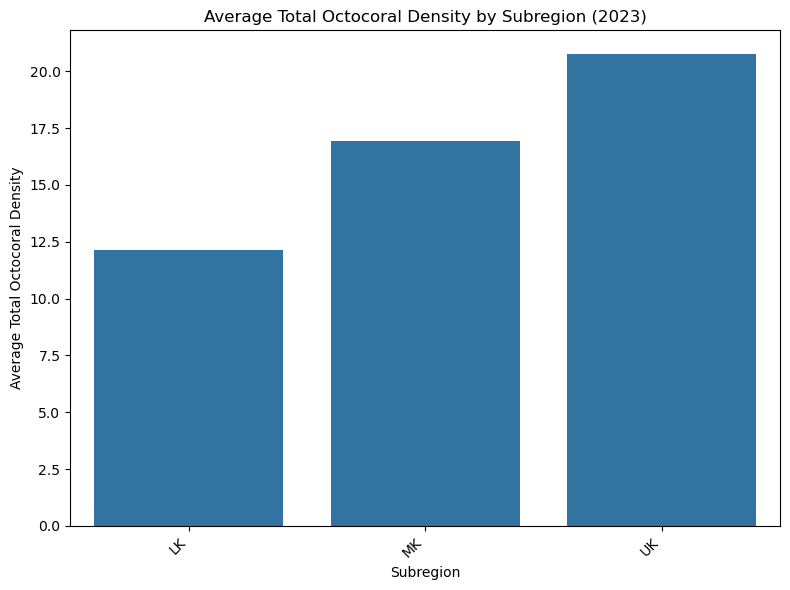

In [43]:
# Calculate the average total octocoral density per subregion
avg_total_octo_density_by_subregion = counts_df.groupby('Subregion')['Total_Octocorals'].mean().reset_index(name='Average_Total_Octocoral_Density')

print("Average Total Octocoral Density by Subregion:")
print(avg_total_octo_density_by_subregion)


plt.figure(figsize=(8, 6))
sns.barplot(x='Subregion', y='Average_Total_Octocoral_Density', data=avg_total_octo_density_by_subregion)
plt.title('Average Total Octocoral Density by Subregion (2023)')
plt.xlabel('Subregion')
plt.ylabel('Average Total Octocoral Density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()